In [65]:
import PyPDF2
import json
import glob
import numpy as np
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt

from itertools import chain
from collections import defaultdict
from pdfminer.high_level import extract_pages, extract_text
from pdfminer.layout import LTTextContainer, LTChar, LTRect, LTFigure

In [2]:
def monthToNum(shortMonth):
    return {
            'January': "01",
            'February': "02",
            'March': "03",
            'April': "04",
            'May': "05",
            'June': "06",
            'July': "07",
            'August': "08",
            'September': "09", 
            'October': "10",
            'November': "11",
            'December': "12"
    }[shortMonth]

def defaultify(d):
    
    # https://stackoverflow.com/questions/50013768/how-can-i-convert-nested-dictionary-to-defaultdict
    
    if not isinstance(d, dict):
        return d
    return defaultdict(lambda: None, {k: defaultify(v) for k, v in d.items()})

In [3]:
path_output=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_presentation.json'

In [4]:
with open(path_output, 'r') as openfile:
     json_object = json.load(openfile)
# print(json_object)
# print(type(json_object))

In [5]:
def_object=defaultify(json_object)

In [7]:
data_table=\
pd.DataFrame([
              col1, col2, col3, col4, d4
             ]
              for col1, d1 in def_object.items()\
              for col2, d2 in d1.items()\
              for col3, d3 in d2.items()\
              for col4, d4 in d3.items()
            )
data_table=data_table.rename(columns={0: 'time',
                                      1: 'company',
                                      2: 'chara1',
                                      3: 'chara2',
                                      4: 'text'})

data_table_=data_table[data_table['chara1'] == 'presentation_people_speech']

data_table_.loc[:, 'text01']=\
data_table_.loc[:, 'text'].apply(
    lambda x: list(x.values())).apply(
    lambda x: list(chain.from_iterable(x))).apply(
    lambda x: ' '.join(x))

data_table_=data_table_.reset_index(drop=True)

/var/folders/6l/2d59bcb16yjbzzkcgz02zhn00000gn/T/ipykernel_82878/3791956451.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table_.loc[:, 'text01']=\


In [10]:
data_table_

,time,company,chara1,chara2,text,text01
0,"Wednesday, May 04, 2011 9:00 PM GMT\nS&P","Tesla Motors, Inc., Q1 2011 Earnings Call, May...",presentation_people_speech,Presentation_0,"{'4': ['Thank you, Tyrone, and thank you all f...","Thank you, Tyrone, and thank you all for joini..."
1,"Wednesday, May 04, 2011 9:00 PM GMT\nS&P","Tesla Motors, Inc., Q1 2011 Earnings Call, May...",presentation_people_speech,Presentation_1,"{'9': ['Hi, so we had a another solid quarter ...","Hi, so we had a another solid quarter of execu..."
2,"Wednesday, May 04, 2011 9:00 PM GMT\nS&P","Tesla Motors, Inc., Q1 2011 Earnings Call, May...",presentation_people_speech,Presentation_2,"{'26': ['Thank you, Elon. The major financial ...","Thank you, Elon. The major financial theme in ..."
3,"Wednesday, May 04, 2011 9:00 PM GMT\nS&P","Tesla Motors, Inc., Q1 2011 Earnings Call, May...",presentation_people_speech,Presentation_3,"{'60': ['Thank you, Deepak. Before we begin th...","Thank you, Deepak. Before we begin the Q&A, we..."
4,"Wednesday, May 09, 2012 9:30 PM GMT\nS&P","Tesla Motors, Inc., Q1 2012 Earnings Call, May...",presentation_people_speech,Presentation_0,"{'4': ['Thank you, Patrick, and good afternoon...","Thank you, Patrick, and good afternoon, everyo..."
...,...,...,...,...,...,...
168,"Wednesday, February 22, 2017 10:30 PM G","Tesla Motors, Inc., Q4 2016 Earnings Call, Oct...",presentation_people_speech,Presentation_4,"{'24': ['All right. So thanks -- and Jason, th...","All right. So thanks -- and Jason, thank you a..."
169,"Wednesday, February 22, 2017 10:30 PM G","Tesla Motors, Inc., Q4 2016 Earnings Call, Oct...",presentation_people_speech,Presentation_5,"{'28': ['So let's see. I think the -- yes. '],...",So let's see. I think the -- yes.\n Jeffrey K....
170,"Wednesday, February 22, 2017 10:30 PM G","Tesla Motors, Inc., Q4 2016 Earnings Call, Oct...",presentation_people_speech,Presentation_6,"{'30': ['Well, I think we're ready for the fir...","Well, I think we're ready for the first questi..."
171,"Wednesday, February 22, 2017 10:30 PM G","Tesla Motors, Inc., Q4 2016 Earnings Call, Oct...",presentation_people_speech,Presentation_7,{'32': ['Yes. That's just right. Do you have a...,Yes. That's just right. Do you have any questi...


In [16]:
data_table_["call_date"]=data_table_["time"].apply(lambda x: x.split(',')[1])
data_table_["call_year"]=\
data_table_["time"].apply(lambda x: x.split(',')[2][0:5])
data_table_["call_time"]=\
data_table_["time"].apply(lambda x: x.split(',')[2][5:11])
data_table_["quarter"]=\
data_table_["company"].apply(lambda x: x.split(',')[2][:3])
data_table_["year_quarter"]=\
data_table_["company"].apply(lambda x: x.split(',')[2][3:9])
data_table_["company_name"]=data_table_["company"].apply(lambda x: x.split(',')[0][0:12])
data_table_=data_table_.sort_values(['year_quarter', 'quarter'])
data_table_=data_table_.reset_index(drop=True)

In [22]:
data_table_['call_month']=\
data_table_['call_date'].apply(
    lambda x: x.split(' ')[1]).apply(
    lambda x: monthToNum(x))

data_table_['call_day']=\
data_table_['call_date'].apply(
    lambda x: x.split(' ')[2])

In [23]:
cols = data_table_.loc[:, ['call_year', 'call_month', 'call_day']].columns
data_table_['call_datetime']=\
data_table_[cols].apply(
    lambda x: '-'.join(x.dropna().astype(str)), 1)

In [34]:
data_table_=data_table_.sort_values(['call_datetime'])

In [80]:
data_table_.groupby(['call_datetime'])['chara2'].nunique().mean()

3.326923076923077

In [38]:
data_table_.groupby(['call_datetime'])['chara2'].nunique()

call_datetime
 2010-11-09     2
 2011-02-15     4
 2011-05-04     4
 2011-08-03     2
 2011-11-02     2
 2012-02-15     2
 2012-05-09     2
 2012-07-25     1
 2012-11-05     1
 2013-02-20     1
 2013-05-08     1
 2013-08-07     1
 2013-11-05     1
 2014-02-19     1
 2014-05-07     1
 2014-07-31     1
 2014-11-05     1
 2015-02-12     1
 2015-05-06     1
 2015-08-05     1
 2015-11-03     9
 2016-02-10     6
 2016-05-04     2
 2016-08-03     2
 2016-10-26     4
 2017-02-22     9
 2017-05-03     6
 2017-08-02    18
 2017-11-01     3
 2018-02-07     1
 2018-05-02     1
 2018-08-01     8
 2018-10-24    24
 2019-01-30     2
 2019-04-24     1
 2019-07-24    11
 2019-10-23    12
 2020-01-29     1
 2020-04-29     1
 2020-07-22     1
 2020-10-21     2
 2021-01-27     1
 2021-04-26     2
 2021-07-26     1
 2022-01-26     4
 2022-04-20     1
 2022-07-20     4
 2022-10-19     1
 2023-01-25     1
 2023-04-19     1
 2023-07-19     1
 2023-10-18     1
Name: chara2, dtype: int64

In [41]:
prenum=data_table_.groupby(['call_datetime'])['chara2'].nunique().values

In [61]:
date=data_table_['call_datetime'].drop_duplicates().reset_index(drop=True)

In [67]:
date=\
pd.to_datetime(date, format='%Y-%m-%d')

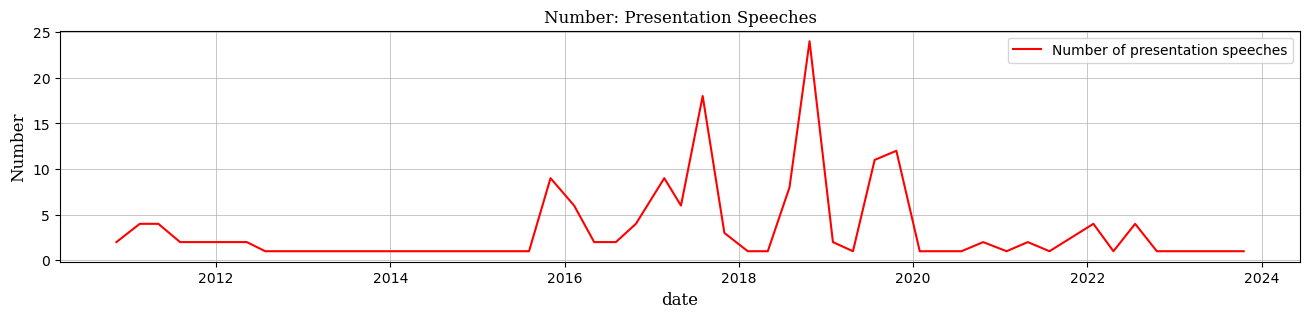

In [77]:
csfont = {'fontname':'serif'}
sizetext=12

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 3))

lns1=\
ax1.plot(date, prenum, label='Number of presentation speeches', color='r')

ax1.set_title("Number: Presentation Speeches", **csfont, size = sizetext)
ax1.set_ylabel('Number', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
# ax1.set_xlim([datetime(2010, 11, 9), datetime(2022, 12, 31)]) 
ax1.grid(linewidth=0.5)
ax1.legend()